<a href="https://colab.research.google.com/github/vbgamer/Internship-Projects/blob/main/SENTIMENTAL_ANALYSIS_ON_SOCIAL_MEDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING BASIC LIB

In [2]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

READING DATASET

In [3]:
# Read Data
df = pd.read_csv('/content/Sentidata.csv', header=None, encoding='latin')
df.columns = ['label', 'id', 'date', 'query', 'user', 'tweet']

# Data reduction
df = df.drop(['id', 'date', 'query', 'user'], axis=1)

In [4]:
labels_dict = {0:'Negative', 2:'Neutral', 4:'Positive'}

def convert_labels(label):
    return labels_dict[label]

df.label = df.label.apply(lambda x: convert_labels(x))
df

,label,tweet
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
19995,Positive,Just woke up. Having no school is the best fee...
19996,Positive,TheWDB.com - Very cool to hear old Walt interv...
19997,Positive,Are you ready for your MoJo Makeover? Ask me f...
19998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


BUILDING INSTANCES

Text(0.5, 1.0, 'Data Distribution')

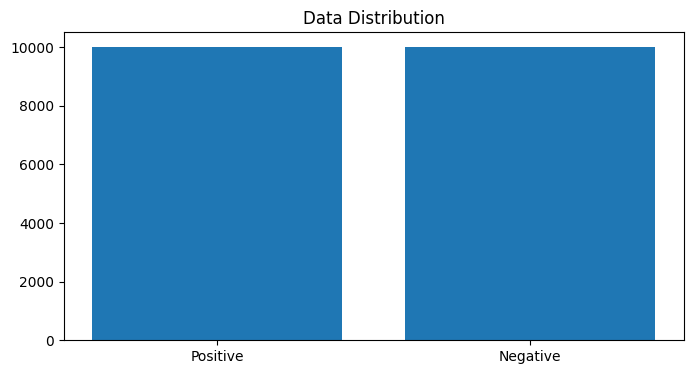

In [5]:
instances = df.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(instances.index, instances.values)
plt.title("Data Distribution")

STOP WORDS

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

punctuations_and_dummies = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"



'''
def preprocess(df, will_be_stemmed=False):
    for index, row in df.iterrows():
        tweet = row.tweet
        tweet = re.sub(punctuations_and_dummies, ' ', str(tweet).lower()).strip()
        tokens = []
        for token in tweet.split():
            if token not in stop_words:
                if will_be_stemmed:
                    tokens.append(stemmer.stem(token))
                else:
                    tokens.append(token)
        df.tweet = " ".join(tokens)


preprocess(df.tweet)
'''


def preprocess(tweet, will_be_stemmed=False):
        tweet = re.sub(punctuations_and_dummies, ' ', str(tweet).lower()).strip()
        tokens = []
        for token in tweet.split():
            if token not in stop_words:
                if will_be_stemmed:
                    tokens.append(stemmer.stem(token))
                else:
                    tokens.append(token)
        return " ".join(tokens)

df.tweet = df.tweet.apply(lambda tw: preprocess(tw))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


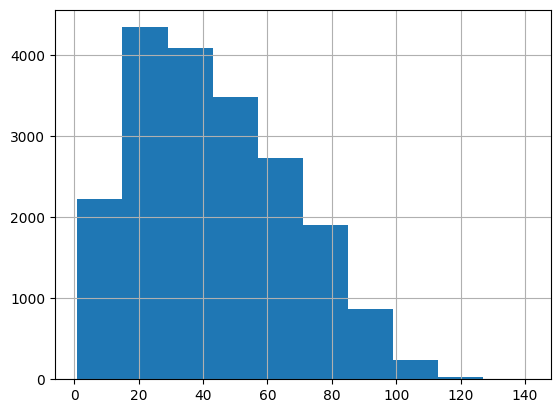

count    19913.000000
mean        42.968865
std         23.932992
min          1.000000
25%         23.000000
50%         40.000000
75%         60.000000
max        141.000000
dtype: float64

In [6]:
# Remove 0 length tweets
df = df[df.iloc[:,1].astype(str).str.len()!=0]
tweets_len = [len(x) for x in df['tweet']]
pd.Series(tweets_len).hist()
plt.show()
pd.Series(tweets_len).describe()

In [6]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

PREPROCESSING DATA

In [7]:
def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')

        processedText.append(tweetwords)

    return processedText

In [10]:
print(df.columns)

Index(['label', 'tweet'], dtype='object')


In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

LEMMATIZER

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


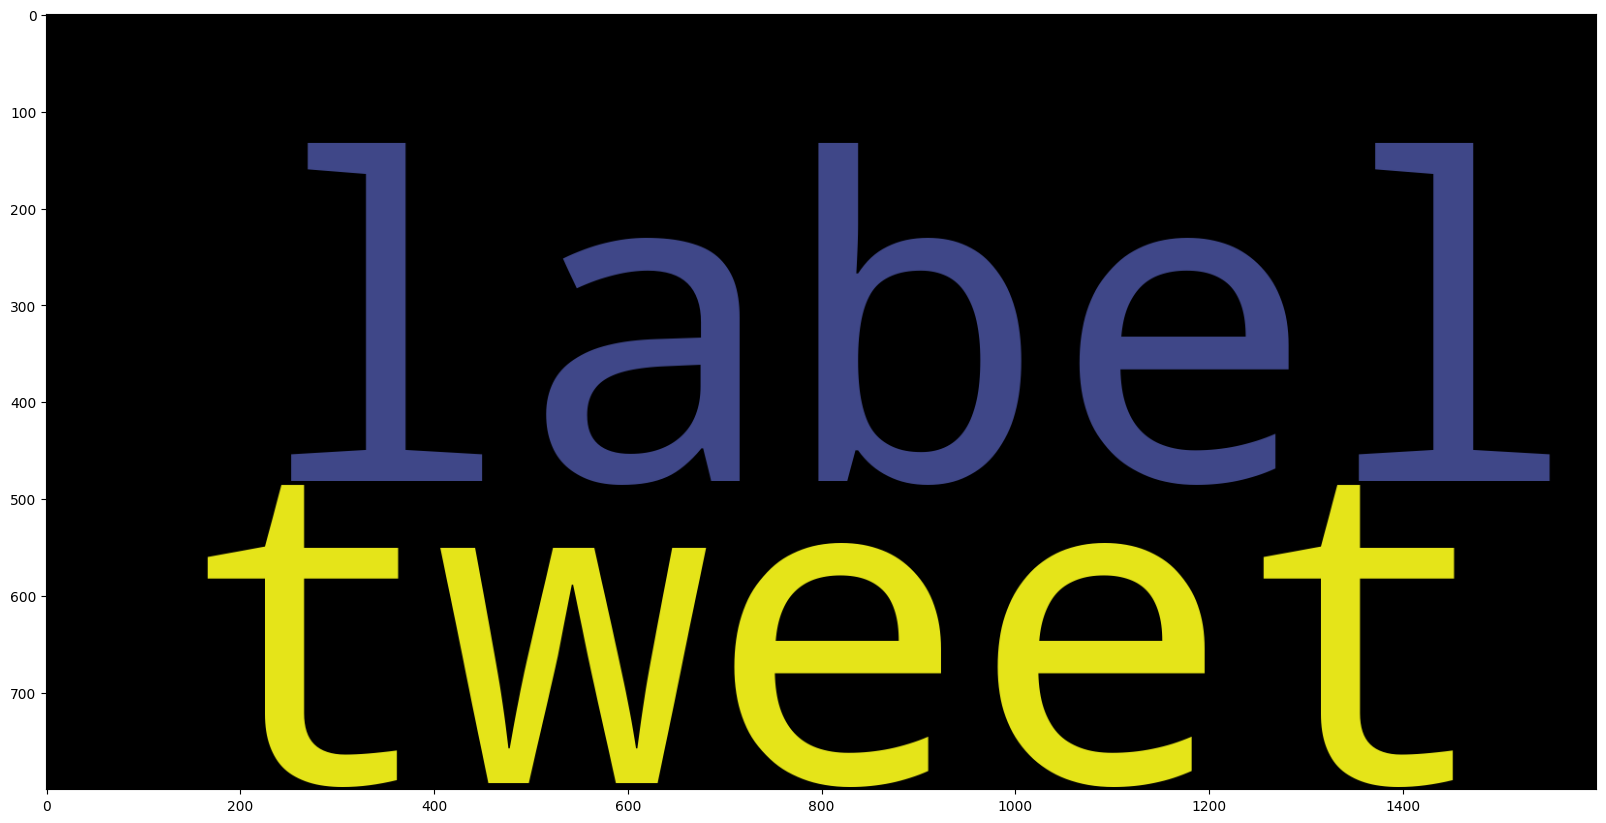

In [13]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ... (rest of your code)

# Call the preprocess function on your text data
processedtext = preprocess(text)

data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [19]:
def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        # Assuming 'emojis' is a dictionary mapping emojis to descriptions
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword. - This line was commented out, which might be causing issues
            # if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')

        # Append the processed tweet only if it's not empty
        if tweetwords.strip():
            processedText.append(tweetwords)

    return processedText

In [27]:
import time
# Define the text data you want to preprocess.
# For example, this could be a list of strings.
text = ["'label', 'tweet'"]

t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 0 seconds


SOME GRAPHS

<BarContainer object of 20 artists>

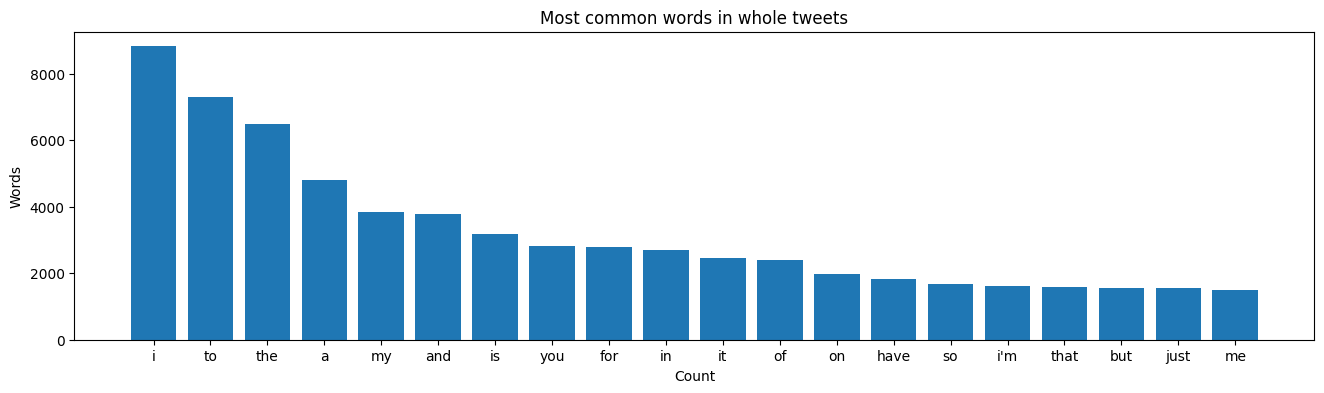

In [30]:
import collections
from wordcloud import WordCloud
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

all_tweets = ' '.join(df['tweet'].str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

plt.figure(figsize = (16, 4))
plt.title('Most common words in whole tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

<BarContainer object of 20 artists>

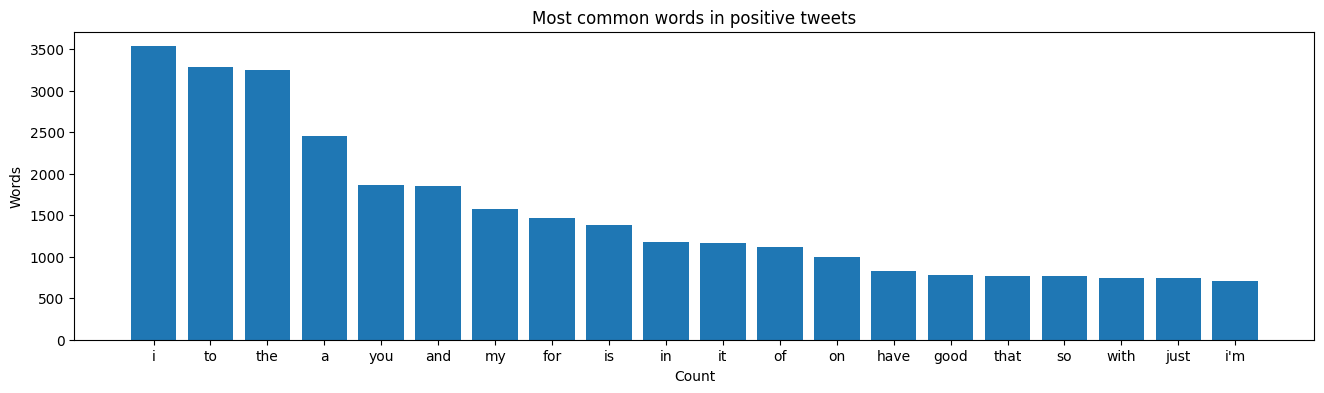

In [31]:
all_tweets = ' '.join(df[df.label == 'Positive'].tweet.str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

plt.figure(figsize = (16, 4))
plt.title('Most common words in positive tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

POSITIVE TWEETS

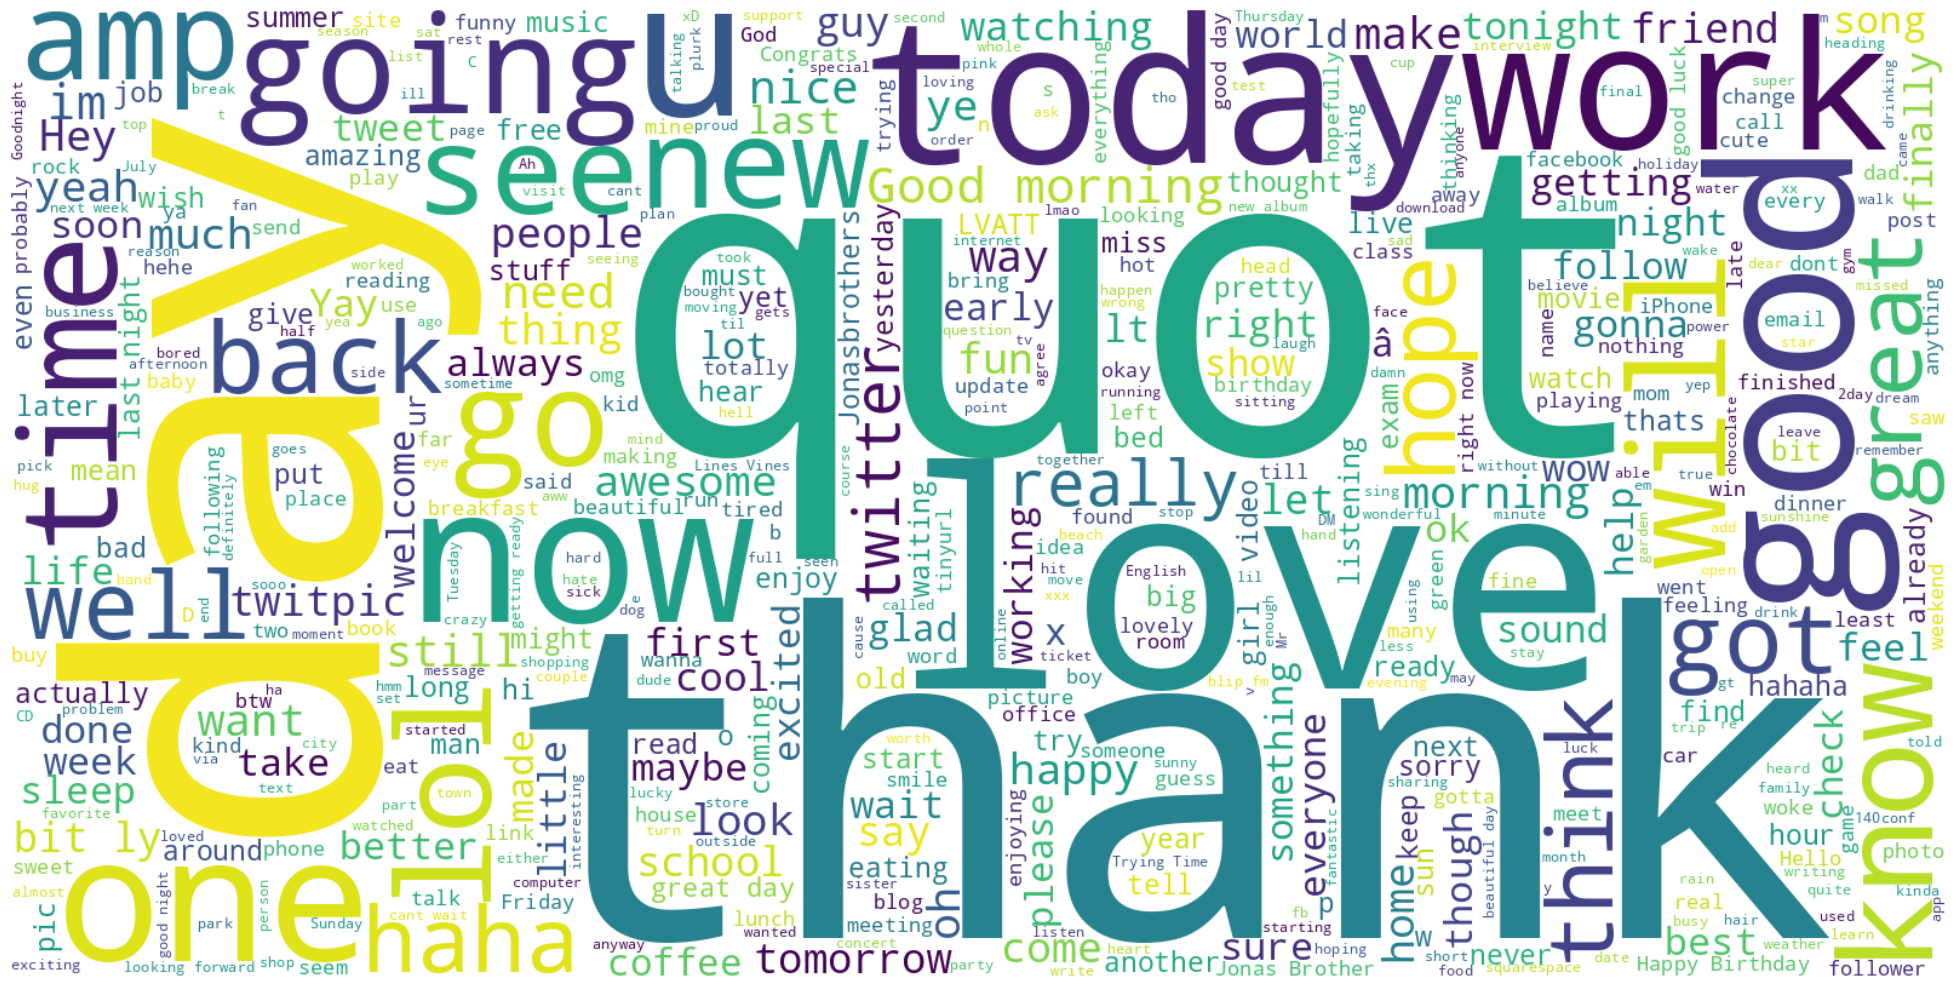

In [32]:
plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Positive'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

NEGATIVE TWEETS

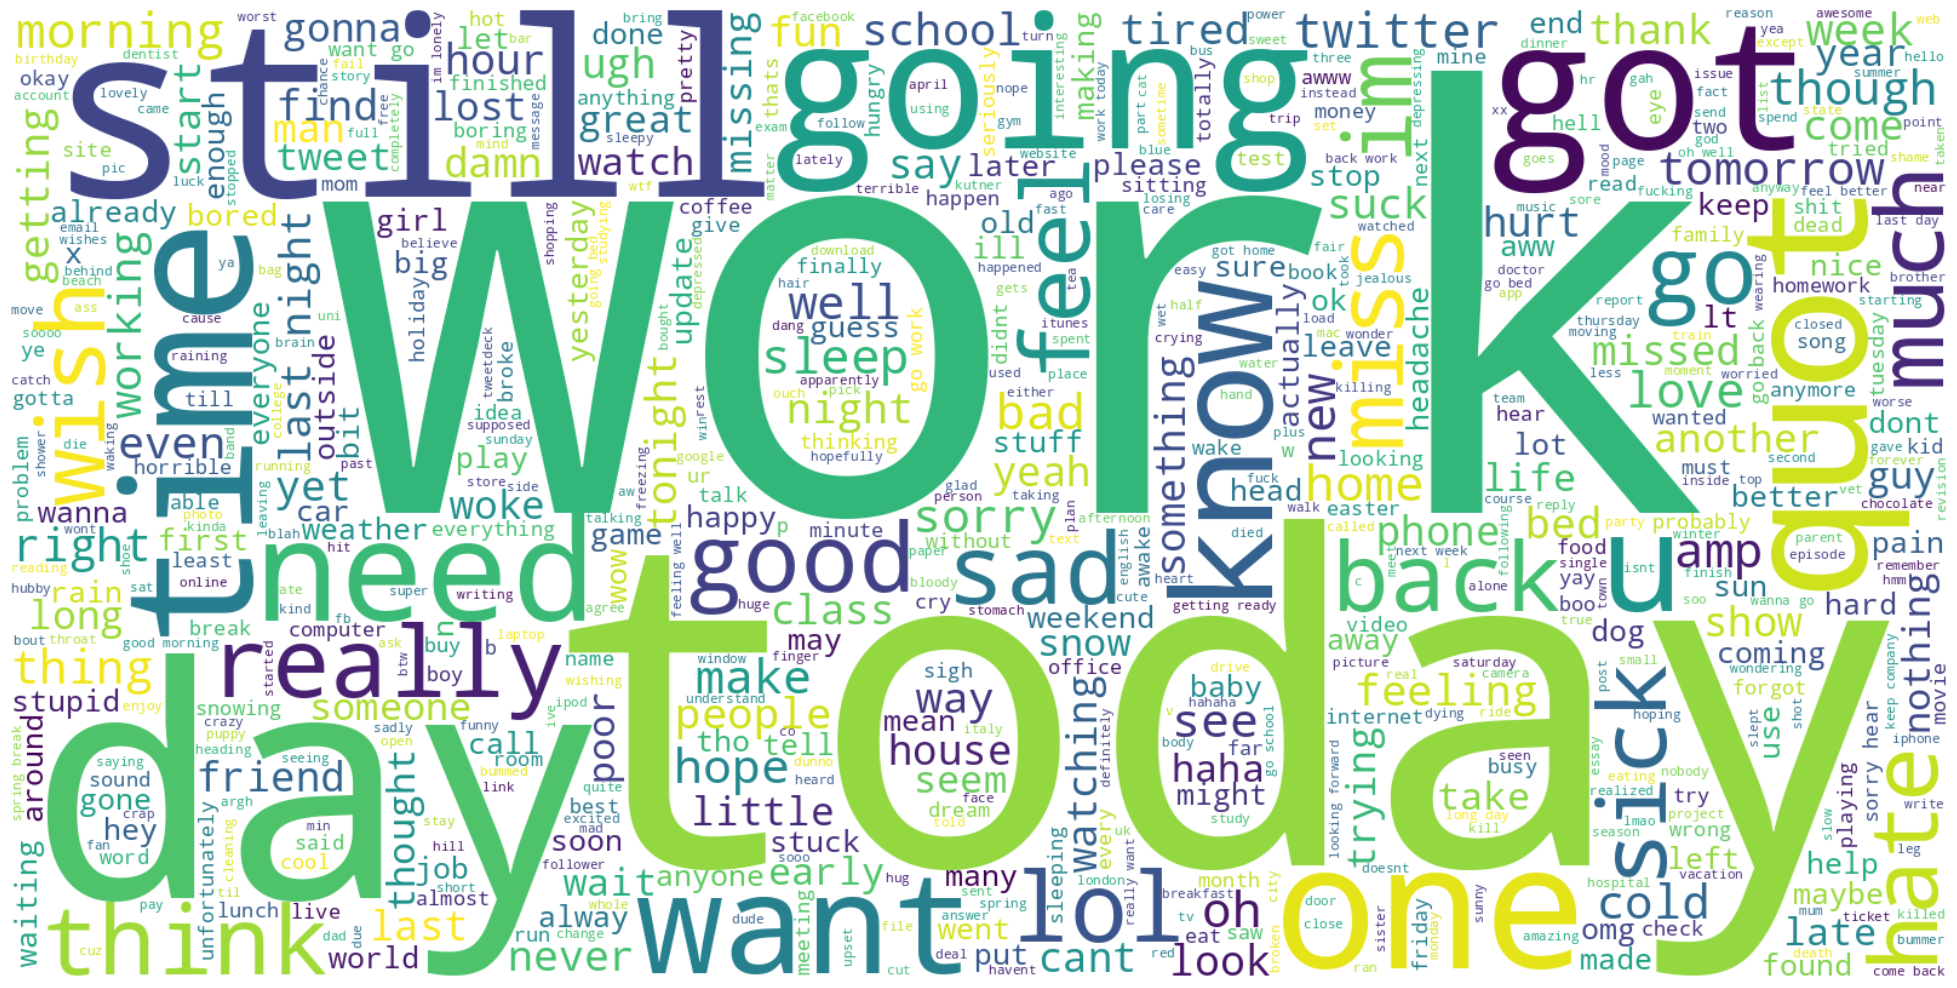

In [28]:
from wordcloud import WordCloud

plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Negative'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

In [29]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=7)
print('Training Data', len(train_data), 'Test Data', len(test_data))

train_data.head(10)

Training Data 15930 Test Data 3983


,label,tweet
11588,Positive,agree totally valet galleria women psycho
14034,Positive,life full surprises finding eternal peace prayers
9194,Negative,yeah sinus infection
7726,Negative,unfortunately happening since yesterday
653,Negative,hmmm greed good motivates individual better mu...
7539,Negative,back spending couple days sis family raining s...
16403,Positive,update time
17022,Positive,sooooo happy right
13025,Positive,love new profile pic looking radiant
3199,Negative,found unsuccessful applying hampshire probatio...


In [49]:
print(df.columns)


Index(['label', 'tweet'], dtype='object')


TRAINING AND SPLITING DATA

In [38]:
def preprocess(textdata):
    processedText = []
    for text in textdata:
        # Perform your text preprocessing steps here, ensuring that you append the processed text to the processedText list.
        # Example:
        processed_text = text.lower()  # Lowercase the text
        processedText.append(processed_text)  # Append the processed text

    return processedText

# Assuming 'df' is your DataFrame and 'label' is the column containing sentiment labels
processedtext = preprocess(df['tweet'])  # Call preprocess and store the result

# Align labels with processed text:
# Create a new DataFrame from the processed text and original labels
new_df = pd.DataFrame({'tweet': processedtext, 'label': df['label']})

# Drop rows where 'tweet' is empty (these were likely removed during preprocessing)
new_df.dropna(subset=['tweet'], inplace=True)

# Now use the aligned data for splitting
X_train, X_test, y_train, y_test = train_test_split(new_df['tweet'], new_df['label'],
                                                    test_size=0.05, random_state=0)
print(f'Data Split done.')

Data Split done.


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  152356


In [41]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [42]:
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [54]:
import pickle
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

EVALUTING MODEL

In [55]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''

    # Load the vectoriser.
    file = open('..path/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('..path/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()

    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))

    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()

    # Text to classify should be in a list.
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]

    df = predict(vectoriser, LRmodel, text)
    print(df.head())

                              text sentiment
0                   I hate twitter  Negative
1       May the Force be with you.  Positive
2  Mr. Stark, I don't feel so good  Negative
